In [1]:
! pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

2023-01-08 10:32:32.554024: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Showing an example of an image with tensorflow and matplotlib

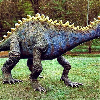

In [3]:
path = './dino-dragon/train/dino'
name = '864123f9-c1ae-4ad9-9498-a3bf9c72e737.jpg'
fullname = f'{path}/{name}'
load_img(fullname,target_size=(100, 100))

In [4]:
img=load_img(fullname,target_size=(100, 100))
array_img=np.array(img)

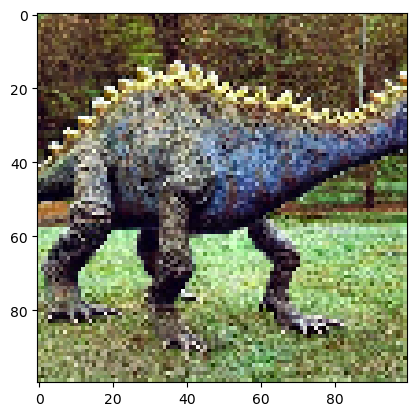

In [5]:
plt.imshow(array_img)

## Creating the model with keras

In [6]:
model = keras.models.Sequential([
    # n, (150,150,3)
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150, 150, 3)), # n, (148,148,32)
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)), # n, (74,74,32)
    keras.layers.Flatten(), # n, (74*74*32 = 175232) 
    keras.layers.Dense(64,activation='relu'), # n, (64) 
    keras.layers.Dense(1,activation='sigmoid') # n, (1)
])

2023-01-08 10:33:09.257903: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-08 10:33:09.264337: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-08 10:33:09.264970: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-08 10:33:09.265910: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

In [8]:
optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/opt/saturncloud/envs/saturn/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


## Train and test datasets generators

In [9]:
train_gen=ImageDataGenerator(rescale=1./255)
test_gen=ImageDataGenerator(rescale=1./255)

In [10]:
train_ds = train_gen.flow_from_directory(
    './dino-dragon/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)
test_ds = test_gen.flow_from_directory(
    './dino-dragon/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


In [11]:
train_ds[0][0][0].shape

(150, 150, 3)

In [12]:
train_ds[0][1][0]

1.0

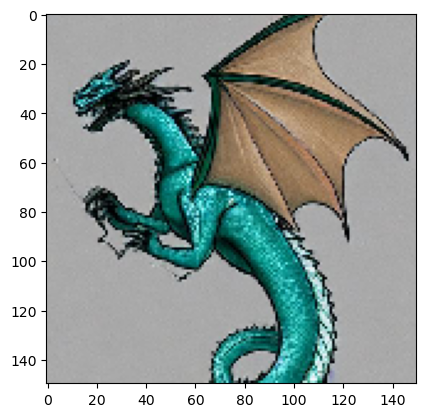

In [13]:
plt.imshow(train_ds[0][0][0])

## Training the model

In [14]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'dino_dragon_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [15]:
history =model.fit(
        train_ds,
        epochs=10,
        validation_data=test_ds,
        callbacks=[chechpoint]
        )

Epoch 1/10


2023-01-08 10:34:30.057620: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-01-08 10:34:30.715367: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-08 10:34:30.716194: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-08 10:34:30.716235: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-01-08 10:34:30.717259: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-08 10:34:30.717350: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


50/50 [==============================] - 12s 199ms/step - loss: 0.6409 - accuracy: 0.6405 - val_loss: 0.5842 - val_accuracy: 0.6675
Epoch 2/10
50/50 [==============================] - 8s 170ms/step - loss: 0.5309 - accuracy: 0.7491 - val_loss: 0.4935 - val_accuracy: 0.7944
Epoch 3/10
50/50 [==============================] - 8s 170ms/step - loss: 0.4628 - accuracy: 0.8043 - val_loss: 0.4603 - val_accuracy: 0.7970
Epoch 4/10
50/50 [==============================] - 8s 170ms/step - loss: 0.4154 - accuracy: 0.8231 - val_loss: 0.4075 - val_accuracy: 0.8376
Epoch 5/10
50/50 [==============================] - 8s 168ms/step - loss: 0.3859 - accuracy: 0.8407 - val_loss: 0.4935 - val_accuracy: 0.7589
Epoch 6/10
50/50 [==============================] - 9s 172ms/step - loss: 0.3622 - accuracy: 0.8463 - val_loss: 0.3828 - val_accuracy: 0.8426
Epoch 7/10
50/50 [==============================] - 9s 184ms/step - loss: 0.3387 - accuracy: 0.8614 - val_loss: 0.4428 - val_accuracy: 0.7970
Epoch 8/10
50/50

## Analyzing the poerformance of the model 

In [68]:
print("the mean of training accuracy : {:.3f}, the std of trainign accuracy : {:.3f}.".format(np.median(history.history['accuracy']),np.std(history.history['accuracy'])))

the mean of training accuracy : 0.945, the std of trainign accuracy : 0.029.


In [70]:
print("the mean of validation accuracy : {:.3f}, the std of validation accuracy : {:.3f}.".format(np.median(history.history['val_accuracy']),np.std(history.history['val_accuracy'])))

the mean of validation accuracy : 0.863, the std of validation accuracy : 0.012.


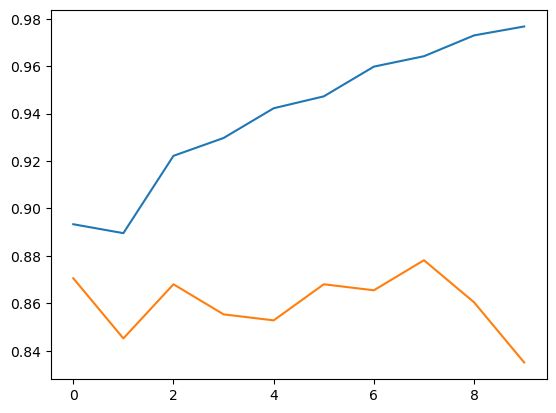

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

## Data Augmentation

In [16]:
train_gen=ImageDataGenerator(rescale=1./255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')
test_gen=ImageDataGenerator(rescale=1./255)

In [17]:
train_ds = train_gen.flow_from_directory(
    './dino-dragon/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)
test_ds = test_gen.flow_from_directory(
    './dino-dragon/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

Found 1594 images belonging to 2 classes.
Found 394 images belonging to 2 classes.


## Taking an example of image to illustrate the data augmentation

In [18]:
fnames = [os.path.join("./dino-dragon/train/dragon", fname) for
    fname in os.listdir("./dino-dragon/train/dragon")]
img_path = fnames[0]
img = load_img(img_path, target_size=(150, 150))

x = img_to_array(img)
x=x.reshape((1,) + x.shape)

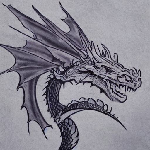

In [19]:
img

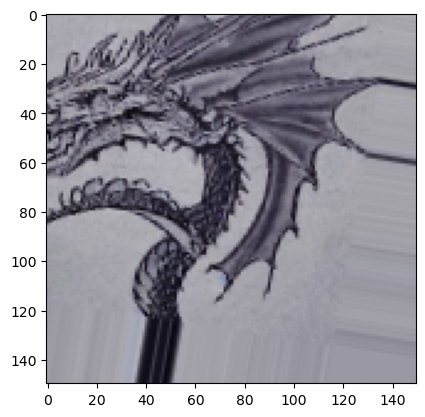

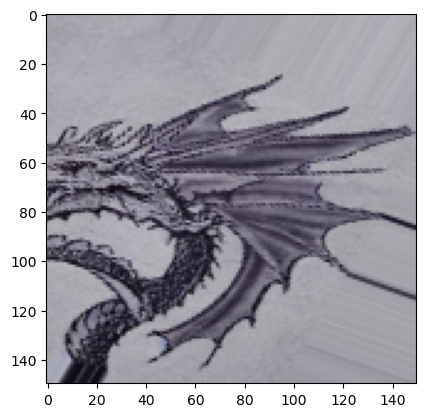

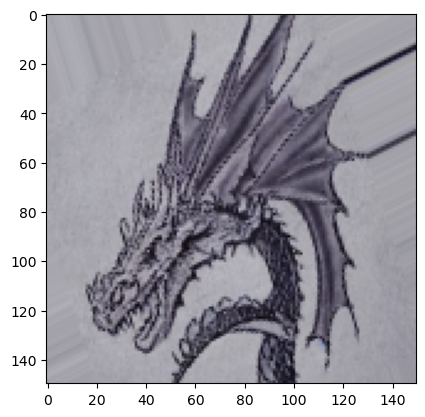

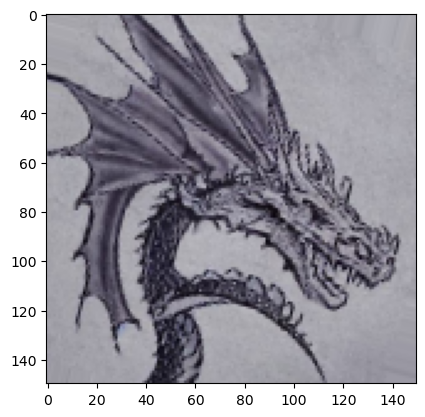

In [20]:
i=0
for batch in train_gen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Training the model on the augmented data

In [22]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'dino_dragon_dataaug_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [23]:
history =model.fit(
        train_ds,
        epochs=10,
        validation_data=test_ds,
        callbacks=[chechpoint]
        )

Epoch 1/10
50/50 [==============================] - 15s 306ms/step - loss: 0.5066 - accuracy: 0.7478 - val_loss: 0.3585 - val_accuracy: 0.8401
Epoch 2/10
50/50 [==============================] - 15s 300ms/step - loss: 0.4470 - accuracy: 0.7873 - val_loss: 0.4061 - val_accuracy: 0.8071
Epoch 3/10
50/50 [==============================] - 15s 299ms/step - loss: 0.3990 - accuracy: 0.8212 - val_loss: 0.4246 - val_accuracy: 0.7995
Epoch 4/10
50/50 [==============================] - 15s 301ms/step - loss: 0.4198 - accuracy: 0.8124 - val_loss: 0.3116 - val_accuracy: 0.8680
Epoch 5/10
50/50 [==============================] - 15s 294ms/step - loss: 0.3938 - accuracy: 0.8350 - val_loss: 0.3960 - val_accuracy: 0.8249
Epoch 6/10
50/50 [==============================] - 15s 299ms/step - loss: 0.3777 - accuracy: 0.8325 - val_loss: 0.3770 - val_accuracy: 0.8401
Epoch 7/10
50/50 [==============================] - 15s 295ms/step - loss: 0.3778 - accuracy: 0.8331 - val_loss: 0.6117 - val_accuracy: 0.7513

In [111]:
print("the mean of test loss : {:.3f}, the mean of test accuracy : {:.3f}.".format(np.mean(history.history['val_loss']),np.mean(history.history['val_accuracy'])))

the mean of test loss : 0.406, the mean of test accuracy : 0.829.


In [112]:
print("the average of test accuracy for the last 5 epochs : {:.3f}.".format(np.mean(history.history['val_accuracy'][5:10])))

the average of test accuracy for the last 5 epochs : 0.811.
